In [1]:
import pandas as pd
import numpy as np
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import csv
from functools import reduce
import re
import string

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
stops = set(stopwords.words("english")) 
wordnet_lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
usa_news = pd.read_csv('Annotations/usanews0/usanews.csv').fillna(0)
labels = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]
col = ["message", "Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]
usa_news[labels] = usa_news[labels].astype("float").replace(r'^\s*$', np.nan, regex=True).fillna(0).replace(np.nan,0)
usa_news = usa_news[col]
usa_news["none"] = (usa_news[labels].max(axis=1) == 0).astype(float)
usa_news

message  Direct Harassment  \
0                              DEMOCRATS ARE TERRORISTS!                0.0   
1      Let's be honest, they aren't voting for Biden,...                0.0   
2                     Where would we be if not for RSBN?                0.0   
3        THEY WON'T BE HAPPY WHEN THEY ARE REGULATED üòõüòõüò•                0.0   
4                                             TRUMP 2020                0.0   
...                                                  ...                ...   
16678                     OUR VOTES WILL DRAIN THE SWAMP                0.0   
16679  Biden MAY BE elected president Tuesday, BUT if...                0.0   
16680                                         Trump 2020                0.0   
16681           I DON'T WANT NO WOMAN FOR PRESIDENT!!!!!                0.0   
16682                            God bless and thank you                0.0   

       Hate Speech  Sexual Harassment  Trolling  Others  Toxic  none  
0              1.0                0.0       0.0     0.0    0.0   0.0  
1              0.0                0.0       0.0     0.0    0.0   1.0  
2              0.0                0.0       0.0     0.0    0.0   1.0  
3              1.0                0.0       0.0     0.0    0.0   0.0  
4              0.0                0.0       0.0     0.0    0.0   1.0  
...            ...                ...       ...     ...    ...   ...  
16678          0.0                0.0       0.0     0.0    0.0   1.0  
16679          0.0                0.0       0.0     0.0    0.0   1.0  
16680          0.0                0.0       0.0     0.0    0.0   1.0  
16681          1.0                0.0       0.0     0.0    0.0   0.0  
16682          0.0                0.0       0.0     0.0    0.0   1.0  

[16683 rows x 8 columns]

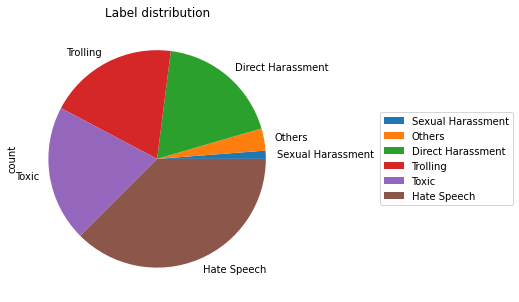

In [3]:
labels2 = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic", "none"]
df_distribution = usa_news[labels2].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.drop('none').plot.pie(y='count',
                                      title='Label distribution',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [4]:
df_distribution.sort_values('count', ascending=False)

count
none               15241.0
Hate Speech          739.0
Toxic                399.0
Trolling             380.0
Direct Harassment    364.0
Others                65.0
Sexual Harassment     24.0

In [6]:
usa_news

Unnamed: 0  Unnamed: 0.1  \
0               0             0   
1               1             1   
2               2             2   
3               3             3   
4               4             4   
...           ...           ...   
16678       16678         39361   
16679       16679         39362   
16680       16680         39363   
16681       16681         39364   
16682       16682         39365   

                                                 message  Direct Harassment  \
0                              DEMOCRATS ARE TERRORISTS!                0.0   
1      Let's be honest, they aren't voting for Biden,...                0.0   
2                     Where would we be if not for RSBN?                0.0   
3        THEY WON'T BE HAPPY WHEN THEY ARE REGULATED üòõüòõüò•                0.0   
4                                             TRUMP 2020                0.0   
...                                                  ...                ...   
16678                     OUR VOTES WILL DRAIN THE SWAMP                0.0   
16679  Biden MAY BE elected president Tuesday, BUT if...                0.0   
16680                                         Trump 2020                0.0   
16681           I DON'T WANT NO WOMAN FOR PRESIDENT!!!!!                0.0   
16682                            God bless and thank you                0.0   

       Hate Speech  Sexual Harassment  Trolling  Others  Toxic  \
0              1.0                0.0       0.0     0.0    0.0   
1              0.0                0.0       0.0     0.0    0.0   
2              0.0                0.0       0.0     0.0    0.0   
3              1.0                0.0       0.0     0.0    0.0   
4              0.0                0.0       0.0     0.0    0.0   
...            ...                ...       ...     ...    ...   
16678          0.0                0.0       0.0     0.0    0.0   
16679          0.0                0.0       0.0     0.0    0.0   
16680          0.0                0.0       0.0     0.0    0.0   
16681          1.0                0.0       0.0     0.0    0.0   
16682          0.0                0.0       0.0     0.0    0.0   

                                         cleaned_message  \
0                              DEMOCRATS ARE TERRORISTS!   
1      Let us be honest, they are not voting for Bide...   
2                     Where would we be if not for RSBN?   
3      THEY Will not BE HAPPY WHEN THEY ARE REGULATED...   
4                                             TRUMP 2020   
...                                                  ...   
16678                     OUR VOTES WILL DRAIN THE SWAMP   
16679  Biden MAY BE elected president Tuesday, BUT if...   
16680                                         Trump 2020   
16681          I Do not WANT NO WOMAN FOR PRESIDENT!!!!!   
16682                            God bless and thank you   

                                                     POS  \
0      [('DEMOCRATS', 'PROPN'), ('be', 'AUX'), ('TERR...   
1      [('let', 'VERB'), ('we', 'PRON'), ('be', 'VERB...   
2      [('where', 'ADV'), ('would', 'AUX'), ('we', 'P...   
3      [('they', 'PRON'), ('will', 'AUX'), ('not', 'P...   
4                  [('TRUMP', 'PROPN'), ('2020', 'NUM')]   
...                                                  ...   
16678  [('our', 'PRON'), ('vote', 'NOUN'), ('will', '...   
16679  [('Biden', 'PROPN'), ('may', 'AUX'), ('be', 'A...   
16680               [('trump', 'NOUN'), ('2020', 'NUM')]   
16681  [('I', 'PRON'), ('do', 'AUX'), ('not', 'PART')...   
16682  [('God', 'PROPN'), ('bless', 'VERB'), ('and', ...   

                                               tagCounts  
0                     {'PROPN': 2, 'AUX': 1, 'PUNCT': 1}  
1      {'VERB': 6, 'PRON': 4, 'ADJ': 3, 'PUNCT': 2, '...  
2      {'ADV': 1, 'AUX': 1, 'PRON': 1, 'VERB': 1, 'SC...  
3      {'PRON': 2, 'AUX': 2, 'PART': 1, 'VERB': 2, 'A...  
4                                 {'PROPN': 1, 'NUM': 1}  
...                                    

In [ ]:
from nltk.corpus import words
import contractions

def extract_words(text):
    text = contractions.fix(text)
    regex = re.compile('[' + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    return nopunct

def lemmatize(word, tag):
    if word == "trump" or word == "joe" or word == "biden":
        return ""
    elif tag.startswith('NN'):
        return wordnet_lemmatizer.lemmatize(word, pos='n')
    elif tag.startswith('VB'):
        return wordnet_lemmatizer.lemmatize(word, pos='v')
    elif tag.startswith('JJ'):
        return wordnet_lemmatizer.lemmatize(word, pos='a')
    else:
        return word

def tokenize(text):
    #tokens = nltk.pos_tag(nltk.word_tokenize(text))
    words = []
    for word, tag in tokens:
        words.append(lemmatize(word, tag))
    words = [w for w in words if not w in stops]
    words = [w for w in words if not w in string.punctuation]
    words = [w.lower() for w in words]
    return words

usa_news['clean_message'] = usa_news['message'].apply(extract_words)
usa_news['tokenized'] = usa_news['clean_message'].apply(tokenize)

In [ ]:
def get_tfidf_vect(documents):
    vectorizer = TfidfVectorizer(ngram_range=(2,3), tokenizer=tokenize, max_df=0.85, analyzer = 'word', min_df=1, max_features=10000, stop_words='english', lowercase=True)
    vector = vectorizer.fit_transform(documents)
    feature_names = np.array(vectorizer.get_feature_names())
    return pd.DataFrame(vector.todense(), columns=feature_names), vector, feature_names


In [ ]:
df, vector, features = get_tfidf_vect(usa_news['message'])
df[labels] = usa_news[labels]

In [ ]:
display(df)

In [ ]:
df.to_pickle("tfidf.pkl")

In [ ]:
top_words = {}
top_words_list = []
for label in labels:
    df_label = df[df[label] == 1.0]
    tfidf = df_label[features]
    combine = np.asarray(tfidf.reset_index(drop=True).sum(axis=0)
    #importance = np.argsort(np.asarray(tfidf.reset_index(drop=True).sum(axis=0)).ravel())[::-1]
    top_words[label] = list(features[importance[:10]])
    top_words_list.extend(list(features[importance[:10]]))

In [14]:
top_words = {}
top_words_list = []
for label in labels:
    df_label = df[df[label] == 1.0]
    tfidf = df_label[features]
    importance = np.argsort(np.asarray(tfidf.reset_index(drop=True).sum(axis=0)).ravel())[::-1]
    top_words[label] = list(features[importance[:10]])
    top_words_list.extend(list(features[importance[:10]]))

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
print(top_words_list)

['crime family', 'lady gaga', 'prison 2020', '47 year', 'cnn suck', 'moises sanchez', 'vice president', 'lock whitmer', 'big liar', 'nursing home', 'moron 2020', 'lady gaga', 'china pay', "ca n't", 'live matter', 'vote vote', 'china virus', 'remove democrat', 'fake news', 'moises sanchez', 'lady gag', 'lady gaga', 'hell kameltoe', 'buck fiden', 'commie bitch', 'gaga make gag', 'make gag lady', 'make gag', 'gag lady', 'gaga make', 'crime family', 'moron 2020', 'üì¢üì¢üì¢breaking news', 'fake news', 'idiot vote', 'communist china', 'bye bye', 'china ccp', 'kamala harris', 'coronavirus hoax', 'sunny yu', 'live matter', 'terror attack', 'beijing prison', '47 year', 'veteran die', 'vice president', 'dont know', 'crazy greta', 'need help', 'lady gaga', 'moron 2020', 'cnn suck', 'prison 2020', 'moises sanchez', 'shit hole', 'nancy pelosi', 'liar marxist', 'crime family', 'brain dead']


C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
top_features = [w for w in features if w in top_words_list]
corr_columns = top_features + labels
df[corr_columns]

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


47 year  beijing prison  big liar  brain dead  buck fiden  bye bye  \
0          0.0             0.0       0.0         0.0         0.0      0.0   
1          0.0             0.0       0.0         0.0         0.0      0.0   
2          0.0             0.0       0.0         0.0         0.0      0.0   
3          0.0             0.0       0.0         0.0         0.0      0.0   
4          0.0             0.0       0.0         0.0         0.0      0.0   
...        ...             ...       ...         ...         ...      ...   
16678      0.0             0.0       0.0         0.0         0.0      0.0   
16679      0.0             0.0       0.0         0.0         0.0      0.0   
16680      0.0             0.0       0.0         0.0         0.0      0.0   
16681      0.0             0.0       0.0         0.0         0.0      0.0   
16682      0.0             0.0       0.0         0.0         0.0      0.0   

       ca n't  china ccp  china pay  china virus  ...  veteran die  \
0         0.0        0.0        0.0          0.0  ...          0.0   
1         0.0        0.0        0.0          0.0  ...          0.0   
2         0.0        0.0        0.0          0.0  ...          0.0   
3         0.0        0.0        0.0          0.0  ...          0.0   
4         0.0        0.0        0.0          0.0  ...          0.0   
...       ...        ...        ...          ...  ...          ...   
16678     0.0        0.0        0.0          0.0  ...          0.0   
16679     0.0        0.0        0.0          0.0  ...          0.0   
16680     0.0        0.0        0.0          0.0  ...          0.0   
16681     0.0        0.0        0.0          0.0  ...          0.0   
16682     0.0        0.0        0.0          0.0  ...          0.0   

       vice president  vote vote  üì¢üì¢üì¢breaking news  Direct Harassment  \
0                 0.0        0.0               0.0                0.0   
1                 0.0        0.0               0.0                0.0   
2                 0.0        0.0               0.0                0.0   
3                 0.0        0.0               0.0                0.0   
4                 0.0        0.0               0.0                0.0   
...               ...        ...               ...                ...   
16678             0.0        0.0               0.0                0.0   
16679             0.0        0.0               0.0                0.0   
16680             0.0        0.0               0.0                0.0   
16681             0.0        0.0               0.0                0.0   
16682             0.0        0.0               0.0                0.0   

       Hate Speech  Sexual Harassment  Trolling  Others  Toxic  
0              1.0                0.0       0.0     0.0    0.0  
1              0.0                0.0       0.0     0.0    0.0  
2              0.0                0.0       0.0     0.0    0.0  
3              1.0                0.0       0.0     0.0    0.0  
4              0.0                0.0       0.0     0.0    0.0  
...            ...                ...       ...     ...    ...  
16678          0.0                0.0       0.0     0.0    0.0  
16679          0.0                0.0       0.0     0.0    0.0  
16680          0.0                0.0       0.0     0.0    0.0  
16681          1.0                0.0       0.0     0.0    0.0  
16682          0.0                0.0       0.0     0.0    0.0  

[16683 rows x 51 columns]

In [17]:
df_corr = df[corr_columns].corr(method="spearman")
x = df_corr.drop(columns=top_features)
x.info()
x

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 47 year to Toxic
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Direct Harassment  51 non-null     float64
 1   Hate Speech        51 non-null     float64
 2   Sexual Harassment  51 non-null     float64
 3   Trolling           51 non-null     float64
 4   Others             51 non-null     float64
 5   Toxic              51 non-null     float64
dtypes: float64(6)
memory usage: 4.8+ KB


Direct Harassment  Hate Speech  Sexual Harassment  \
47 year                     0.031678    -0.009289          -0.001638   
beijing prison              0.077185     0.053112          -0.000588   
big liar                    0.059197    -0.002887          -0.000509   
brain dead                  0.037000     0.052489          -0.000778   
buck fiden                  0.028597    -0.002887           0.117438   
bye bye                     0.003619    -0.008984          -0.001584   
ca n't                      0.009769     0.019762          -0.001837   
china ccp                  -0.002833     0.026645          -0.000720   
china pay                  -0.003060     0.066716          -0.000778   
china virus                 0.046628     0.054240          -0.000930   
cnn suck                    0.062089     0.026647          -0.000720   
commie bitch                0.035840     0.024252           0.144035   
communist china             0.057039     0.038261          -0.000778   
coronavirus hoax           -0.002313    -0.003334          -0.000588   
crazy greta                 0.035840     0.024252          -0.000416   
crime family                0.059536     0.020502          -0.001212   
dont know                  -0.002313     0.034301          -0.000588   
fake news                   0.017072     0.035659          -0.001907   
gag lady                   -0.001635    -0.002357           0.288485   
gaga make                   0.028600    -0.002887           0.235370   
gaga make gag              -0.001635    -0.002357           0.288485   
hell kameltoe               0.028599    -0.002887           0.117445   
idiot vote                 -0.002313     0.034298          -0.000588   
kamala harris              -0.004480     0.032421          -0.001139   
lady gag                   -0.003658    -0.005273           0.192940   
lady gaga                   0.046202     0.027015           0.087405   
liar marxist               -0.002313     0.053117          -0.000588   
live matter                 0.013901     0.062330          -0.001556   
lock whitmer                0.037009    -0.004411          -0.000778   
make gag                   -0.001635    -0.002357           0.288485   
make gag lady              -0.001635    -0.002357           0.288485   
moises sanchez              0.089796     0.062293          -0.000509   
moron 2020                  0.037009     0.080940          -0.000778   
nancy pelosi               -0.004171    -0.006012          -0.001060   
need help                  -0.003060    -0.004411          -0.000778   
nursing home                0.025241    -0.006012          -0.001060   
prison 2020                 0.057876     0.044370          -0.001470   
remove democrat            -0.005043     0.027311          -0.001282   
shit hole                   0.059195     0.040565          -0.000509   
sunny yu                    0.059197     0.040566          -0.000509   
terror attack              -0.005549    -0.007999          -0.001410   
veteran die                -0.001635    -0.002357          -0.000416   
vice president              0.002584    -0.009840          -0.002516   
vote vote                  -0.004564     0.018797          -0.003466   
üì¢üì¢üì¢breaking news           -0.002313    -0.003334          -0.000588   
Direct Harassment           1.000000     0.270956           0.124237   
Hate Speech                 0.270956     1.000000           0.030260   
Sexual Harassment           0.124237     0.030260           1.000000   
Trolling                    0.125705     0.146777           0.015406   
Others                      0.109210     0.098768          -0.002374   
Toxic                       0.247848     0.252308           0.066515   

                   Trolling    Others     Toxic  
47 year           -0.006587  0.019670 -0.006754  
beijing prison     0.049532  0.061189 -0.002424  
big liar          -0.002047 -0.000839 -0.002099  
brain dead        -0.003128 -0.001281  0.054258  
buck fiden     

In [18]:
# for label in labels:
#     for top_f in top_features:
#         if not top_f in top_words[label]:
#             x.at[top_f,label] = np.nan

# x

df_labels_corr = []

for label_corr in labels:
    df_d_corr = pd.DataFrame(index=top_words[label_corr], columns=labels)

    for label in labels:
        for top_f in top_features:
            if top_f in top_words[label_corr]:
                df_d_corr.at[top_f,label] = x.at[top_f,label]
    df_d_corr = df_d_corr.style.set_caption(label_corr)
    df_labels_corr.append(df_d_corr)

for df in df_labels_corr:
    display(df)


C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
#import required packages
#basic
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings
#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
#nlp
import string
import re     #for regex
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from gensim.corpora import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def get_bow_vect(documents):
    vectorizer = CountVectorizer(ngram_range=(1,3), tokenizer=tokenize, analyzer = 'word', max_features=10000, stop_words='english', lowercase=True)
    vector = vectorizer.fit_transform(documents)
    feature_names = np.array(vectorizer.get_feature_names())
    return pd.DataFrame(vector.todense(), columns=feature_names), vector, feature_names

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
documents = usa_news['message']
df_bow, bow_vector, bow_features = get_bow_vect(documents)

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Phoebe\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [32]:
display(df_bow)

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


''  '' ``  '' `` https  '' come  '' use  '' use super  \
0       0      0            0        0       0             0   
1       0      0            0        0       0             0   
2       0      0            0        0       0             0   
3       0      0            0        0       0             0   
4       0      0            0        0       0             0   
...    ..    ...          ...      ...     ...           ...   
16678   0      0            0        0       0             0   
16679   0      0            0        0       0             0   
16680   0      0            0        0       0             0   
16681   0      0            0        0       0             0   
16682   0      0            0        0       0             0   

       '' useüí≤superchatüí≤‚¨á‚¨á‚¨á‚¨áüëçüëç  '' ¬°‚ô°  '' √∞√ø  '' √∞√ø ‚Äò  ...  üß° üíõ  üß° üíõ üíô  üß±  \
0                            0      0      0        0  ...    0      0  0   
1                            0      0      0        0  ...    0      0  0   
2                            0      0      0        0  ...    0      0  0   
3                            0      0      0        0  ...    0      0  0   
4                            0      0      0        0  ...    0      0  0   
...                        ...    ...    ...      ...  ...  ...    ... ..   
16678                        0      0      0        0  ...    0      0  0   
16679                        0      0      0        0  ...    0      0  0   
16680                        0      0      0        0  ...    0      0  0   
16681                        0      0      0        0  ...    0      0  0   
16682                        0      0      0        0  ...    0      0  0   

       üß± rise  üß± rise üß±  üß± tax  üß± tax üß±  üß± üß±  üß± üß± tax  üß± üß± üß±  
0           0         0      0        0    0        0      0  
1           0         0      0        0    0        0      0  
2           0         0      0        0    0        0      0  
3           0         0      0        0    0        0      0  
4           0         0      0        0    0        0      0  
...       ...       ...    ...      ...  ...      ...    ...  
16678       0         0      0        0    0        0      0  
16679       0         0      0        0    0        0      0  
16680       0         0      0        0    0        0      0  
16681       0         0      0        0    0        0      0  
16682       0         0      0        0    0        0      0  

[16683 rows x 10000 columns]

In [42]:

texts =  [tokenize(text) for text in usa_news['message']]
texts

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['democrats', 'are', 'terrorists'],
 ['let',
  "'s",
  'honest',
  "n't",
  'vote',
  'biden',
  "'s",
  'kamala',
  'one',
  'keep',
  'secret',
  'person',
  'worst',
  'pick',
  'kamala'],
 ['where', 'would', 'rsbn'],
 ['they',
  'wo',
  "n't",
  'be',
  'happy',
  'when',
  'they',
  'are',
  'regulated',
  'üòõüòõüò•'],
 ['trump', '2020'],
 ['salt', 'must', 'flow'],
 ['corn',
  'pop',
  'say',
  'i',
  'pity',
  'da',
  'fool',
  "n't",
  'eat',
  'mr',
  't',
  'cereal'],
 ['rsbn',
  'is',
  'the',
  'greatest',
  'gift',
  'for',
  'this',
  'climactic',
  'moment',
  'in',
  'american',
  'history'],
 ['trump', '95', 'in', 'californiaü§©ü§©ü§©ü§©ü§©ü§©ü§©ü§©'],
 ['üíô', 'bide\u200en', 'fo\u200dr', 'racism', 'üíô'],
 ['oe',
  'biden',
  'is',
  'a',
  'trojan',
  'horse',
  'for',
  'socialism',
  'thru',
  'sanders',
  'aoc',
  'omar',
  'pressley',
  'tlaib',
  'vote',
  'these',
  'socialists',
  'out',
  'of',
  'office',
  'stand',
  'our',
  'country',
  'our

In [44]:
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in texts]

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.052*"66" + 0.047*"69" + 0.046*"280" + 0.043*"279" + 0.039*"440" + '
  '0.032*"62" + 0.031*"63" + 0.031*"1983" + 0.029*"70" + 0.027*"288"'),
 (1,
  '0.157*"4" + 0.095*"3" + 0.025*"1415" + 0.024*"1414" + 0.024*"339" + '
  '0.016*"87" + 0.013*"347" + 0.012*"660" + 0.011*"1916" + 0.011*"7600"'),
 (2,
  '0.121*"51" + 0.096*"424" + 0.057*"49" + 0.041*"231" + 0.032*"156" + '
  '0.031*"403" + 0.020*"9" + 0.018*"52" + 0.018*"240" + 0.015*"226"'),
 (3,
  '0.051*"40" + 0.042*"1038" + 0.040*"1145" + 0.034*"5224" + 0.033*"1118" + '
  '0.023*"106" + 0.020*"348" + 0.018*"1083" + 0.017*"934" + 0.017*"693"'),
 (4,
  '0.275*"27" + 0.143*"14" + 0.069*"44" + 0.069*"26" + 0.041*"3722" + '
  '0.028*"643" + 0.027*"656" + 0.026*"2078" + 0.020*"254" + 0.016*"450"'),
 (5,
  '0.163*"111" + 0.089*"3966" + 0.067*"110" + 0.037*"114" + 0.024*"1082" + '
  '0.022*"457" + 0.020*"1419" + 0.020*"11" + 0.018*"5416" + 0.017*"19"'),
 (6,
  '0.052*"36" + 0.050*"239" + 0.050*"170" + 0.047*"146" + 0.036*"59" + '
  '0

C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Phoebe\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: object of type 'int' has no len()